# 🧠 Data Visualization For
In this notebook, we will:
- Use transfer learning (MobileNetV2) to feature extraction
- Extract features from the bottleneck layer
- Reduce them using PCA
- Visualize with matplotlib


Extracting dataset...
Found 2000 files belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Label sum (dog=1): 40
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 653ms/step


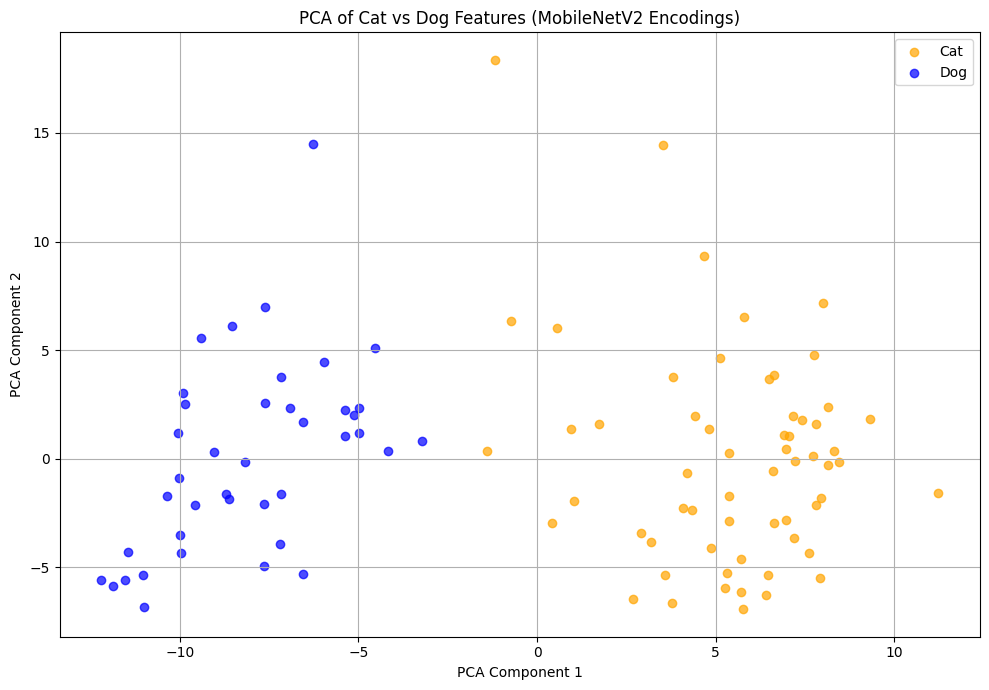

In [5]:
# import tensorflow as tf
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# from tensorflow.keras.preprocessing import image_dataset_from_directory
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import numpy as np
# import os

# # Step 1: Download and extract dataset
# target_dir = r"D:\Visual Studio Code\AI_Classes_Aifalabs\lecutre-5"
# zip_file_path = os.path.join(target_dir, "cats_and_dogs_filtered.zip")
# extracted_path = os.path.join(target_dir, "cats_and_dogs_filtered")

# dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
# zip_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=dataset_url, extract=True)
# train_dir = os.path.join(extracted_path, "train")

# # Step 2: Load dataset
# IMG_SIZE = 160
# BATCH_SIZE = 100

# train_dataset = image_dataset_from_directory(
#     train_dir,
#     image_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=BATCH_SIZE,
#     shuffle=True  # For label-image consistency
# )

# # Step 3: Load a single batch
# for batch_images, batch_labels in train_dataset.take(10):
#     images = preprocess_input(batch_images)
#     labels = batch_labels.numpy()

# # Step 4: Load MobileNetV2
# base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
#                          include_top=False,
#                          pooling='avg',
#                          weights='imagenet')
# base_model.trainable = False

# print(sum(labels))
# # Step 5: Get encodings
# features = base_model.predict(images)

# # Step 6: PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# features_2d = pca.fit_transform(features)

# # Step 7: Plot with proper legend handling
# plt.figure(figsize=(10, 7))
# cat_points = features_2d[labels == 0]
# dog_points = features_2d[labels == 1]

# plt.scatter(cat_points[:, 0], cat_points[:, 1], color='orange', label='Cat', alpha=0.7)
# plt.scatter(dog_points[:, 0], dog_points[:, 1], color='blue', label='Dog', alpha=0.7)

# plt.title("PCA of Cat vs Dog Features (MobileNetV2 Encodings)")
# plt.xlabel("PCA Component 1")
# plt.ylabel("PCA Component 2")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()




import os
import zipfile
import urllib.request
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Download and extract dataset into your specific folder
target_dir = r"D:\Visual Studio Code\AI_Classes_Aifalabs\lecutre-5"
os.makedirs(target_dir, exist_ok=True)  # ✅ Make sure the folder exists

zip_file_path = os.path.join(target_dir, "cats_and_dogs_filtered.zip")
extracted_path = os.path.join(target_dir, "cats_and_dogs_filtered")
train_dir = os.path.join(extracted_path, "train")

dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
if not os.path.exists(zip_file_path):
    print("Downloading dataset...")
    urllib.request.urlretrieve(dataset_url, zip_file_path)
else:
    print("Dataset already downloaded.")

if not os.path.exists(extracted_path):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(target_dir)
else:
    print("Dataset already extracted.")

# Step 2: Load dataset
IMG_SIZE = 160
BATCH_SIZE = 100

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

# Step 3: Load a single batch
for batch_images, batch_labels in train_dataset.take(1):  # just take 1 batch for PCA
    images = preprocess_input(batch_images)
    labels = batch_labels.numpy()

# Step 4: Load MobileNetV2
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         pooling='avg',
                         weights='imagenet')
base_model.trainable = False

print("Label sum (dog=1):", sum(labels))

# Step 5: Get encodings
features = base_model.predict(images)

# Step 6: PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

# Step 7: Plot with proper legend handling
plt.figure(figsize=(10, 7))
cat_points = features_2d[labels == 0]
dog_points = features_2d[labels == 1]

plt.scatter(cat_points[:, 0], cat_points[:, 1], color='orange', label='Cat', alpha=0.7)
plt.scatter(dog_points[:, 0], dog_points[:, 1], color='blue', label='Dog', alpha=0.7)

plt.title("PCA of Cat vs Dog Features (MobileNetV2 Encodings)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
